# Jake Richter
# HW 5 - Ordinary DE

Note - to see the animations just run that specific cell. Scene = canvas() helps animate in vpython

Sorry about the lateness I was up all night mostly trying to figure out how to get all this to work just right in Jupyter Notebook.

---

## Problem 8.2

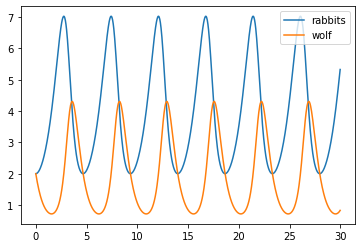

In [12]:

import numpy as np 
import matplotlib.pyplot as plt 

# Goal to make a generic 4th order Runge Kutte DE Solver
# Fourth Order Runge Kutta method for two variables 

def f(r,t):
    x = r[0]
    y = r[1]
    a = 1.0
    b = .50
    g = .50
    d = 2.0 

    f1 = a*x - b*x*y
    f2 = g*x*y - d*y

    return np.array([f1,f2]) 

def Numerical_DE(t0,tf,N,x0,y0):
    h = (tf-t0)/N            # creating the step size h
    half = .5 
    sixth = 1/6          

    time = np.arange(t0,tf,h) # creating the time steps
    r = np.empty((len(time),2),dtype = float)   # intializing x, y 
    
    r[0][0] = x0
    r[0][1] = y0 


    for c,t in enumerate(time):
        if c == N-1:
            break 
        else :
            k1 = h*f(r[c,:],t)
            k2 = h*f(r[c,:] + half*k1, t + half*h)
            k3 = h*f(r[c,:] + half*k2, t + half*h)
            k4 = h*f(r[c,:] + k3, t + h)
            r[c+1,:] = r[c,:] + sixth*(k1 + 2*k2 + 2*k3 + k4)
    

    xl = r[:,0]
    yl = r[:,1]

    plt.figure()
    plt.plot(time,xl, label= 'rabbits')
    
    plt.plot(time,yl,label = 'wolf')
    plt.legend()
    plt.show()

    # return xl, yl, time

Numerical_DE(0,30,1000,2.0,2.0)

## Part B - The Response

It appears the populations are oscilating when wolf population goes up rabbit population goes down and vice versa

---

# Problem 8.3 - The Lorenz Equations

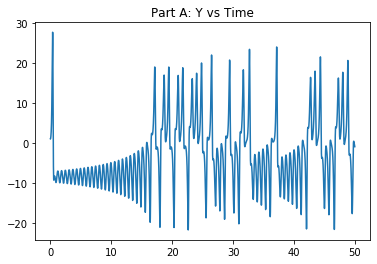

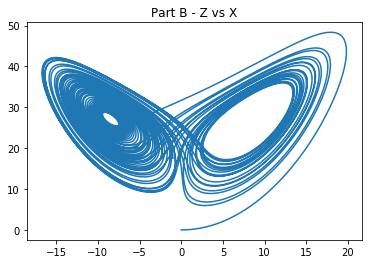

In [43]:
import numpy as np 
import matplotlib.pyplot as plt 

def f3d(r,t):
    x = r[0]
    y = r[1]
    z = r[2]
    theta = 10.0 # intializing Constant values
    rp    = 28.0
    b     = 8/3

    # Evaluting the functions

    f1 = theta*(y - x)
    f2 = rp*x - y - x*z
    f3 = x*y - b*z

    return np.array([f1,f2,f3]) 

def Numerical_DE3d(t0,tf,N,x0,y0,z0):
    h = (tf-t0)/N            # creating the step size h
    half = .5 
    sixth = 1/6          

    time = np.arange(t0,tf,h) # creating the time steps
    r = np.empty((len(time),3),dtype = float)   # intializing x, y 
    
    r[0][0] = x0
    r[0][1] = y0 
    r[0][2] = z0


    for c,t in enumerate(time):
        if c == N-1:
            break 
        else :
            k1 = h*f3d(r[c,:],t)
            k2 = h*f3d(r[c,:] + half*k1, t + half*h)
            k3 = h*f3d(r[c,:] + half*k2, t + half*h)
            k4 = h*f3d(r[c,:] + k3, t + h)
            r[c+1,:] = r[c,:] + sixth*(k1 + 2*k2 + 2*k3 + k4)
   
    xl = r[:,0]
    yl = r[:,1]
    zl = r[:,2]

    plt.figure()
    plt.title('Part A: Y vs Time')
    plt.plot(time,yl)
    plt.figure()
    plt.plot(xl,zl)
    plt.title("Part B - Z vs X")
    
    plt.show()

    # return xl, yl, time

Numerical_DE3d(0,50,10000,0.0,1.0,0.0)

---

# Problem 8.4 - Pendulum 1

## Part A - The Harmonic

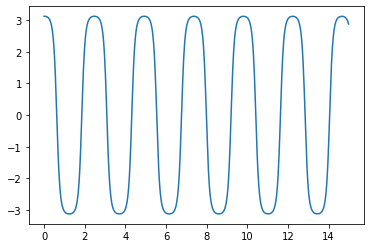

In [2]:
import numpy as np 
from numpy import sin,pi, cos, arctan
import matplotlib.pyplot as plt

def f(r,t):
    theta = r[0]
    omega = r[1]
    g = 9.81 # m/s^2
    l = .1   # m
    g_l = g/l
    f1 = omega
    f2 = -g_l*sin(theta)

    return np.array([f1,f2]) 

def Numerical_DE(t0,tf,N,theta0):
    theta0 *= np.pi/180
    omega0 = 0.0
    
    h = (tf-t0)/N                               # creating the step size h
    half = .5 
    sixth = 1/6          

    time = np.arange(t0,tf,h)                   # creating the time steps
    r = np.empty((len(time),2),dtype = float)   # intializing x, y 
    
    r[0][0] = theta0
    r[0][1] = omega0
    for c,t in enumerate(time):                 # to animate - go through this for loop to get the updated pos/velocity 
                                                                                            
        if c == N-1:
            break 
        else :
            k1 = h*f(r[c,:],t)
            k2 = h*f(r[c,:] + half*k1, t + half*h)
            k3 = h*f(r[c,:] + half*k2, t + half*h)
            k4 = h*f(r[c,:] + k3, t + h)
            r[c+1,:] = r[c,:] + sixth*(k1 + 2*k2 + 2*k3 + k4)

    
    thetal = r[:,0]
    omegal = r[:,1]

    
    plt.figure()

    plt.plot(time,thetal)

    plt.show()
    
    return thetal, omegal, time 


theta, omega, time = Numerical_DE(0,15,1000,179)


    

## Part B - The Animation pt 1

In [4]:

from vpython import box,sphere, cylinder, color, vector,rate, scene, canvas

scene = canvas()
radi = .005
vlength = .1

ball = sphere(pos = vector(vlength*cos(theta[0]),vlength*sin(theta[0]),0), radius = radi, color = color.red)
rod  = cylinder(pos = vector(0,0,0), axis = vector(vlength*cos(theta[0]),vlength*sin(theta[0]),0), radius = .25*radi )

xhat = cylinder(pos = vector(0,0,0), axis = vector(vlength,0,0), radius = .1*radi) # Basis vectors for easy viewing
yhat = cylinder(pos = vector(0,0,0), axis = vector(0,vlength,0), radius = .1*radi, color = color.blue)
zhat = cylinder(pos = vector(0,0,0), axis = vector(0,0,vlength), radius = .1*radi, color = color.red)

# base = box( pos = vector(0,0,0), length = .01, height = .01, width = .01)
while True: 
    for degree in theta:
        rate(30)
        ball.pos = vector(vlength*sin(degree),-vlength*cos(degree ),0)
        rod.axis = vector(vlength*sin(degree),-vlength*cos(degree ),0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

---

# Problem 8.6

## Part A - The generic

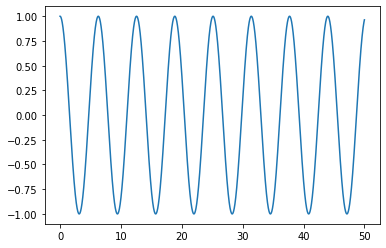

In [32]:
import numpy as np
from numpy import sin, cos
import matplotlib.pyplot as plt 

# Part A #

def f(r,t,w):
    x = r[0]
    row = r[1]
    
    w = 1.0 
    f1 = row
    f2 =-w**2 * x

    return np.array([f1,f2]) 

def Numerical_DE(t0,tf,N,row0,x0):
    
    
    h = (tf-t0)/N                               # creating the step size h
    half = .5 
    sixth = 1/6          

    time = np.arange(t0,tf,h)                   # creating the time steps
    r = np.empty((len(time),2),dtype = float)   # intializing x, y 
    
    r[0][0] = row0
    r[0][1] = x0
    for c,t in enumerate(time):                 # to animate - go through this for loop to get the updated pos/velocity 
                                                                                            
        if c == N-1:
            break 
        else :
            k1 = h*f(r[c,:],t,1)
            k2 = h*f(r[c,:] + half*k1, t + half*h,1)
            k3 = h*f(r[c,:] + half*k2, t + half*h,1)
            k4 = h*f(r[c,:] + k3, t + h,1)
            r[c+1,:] = r[c,:] + sixth*(k1 + 2*k2 + 2*k3 + k4)

    
    rowl = r[:,0]
    xl = r[:,1]

    
    plt.figure()

    plt.plot(time,xl)

    plt.show()
    
    # return thetal, omegal, time 
Numerical_DE(0,50,10000,0,1)






## Part B - The similarity 

We see that they are in fact very similar

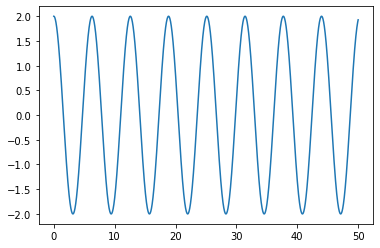

In [33]:
# Part B # 

Numerical_DE(0,50,10000,0,2)


## Part C/D - Fun with Phase Spaces 

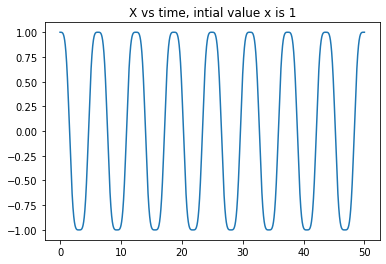

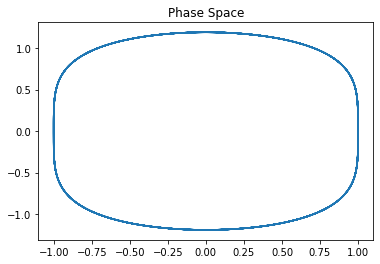

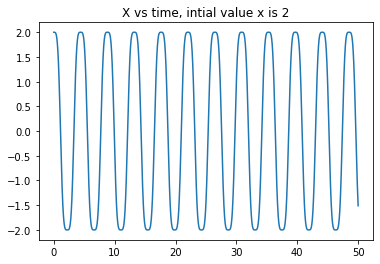

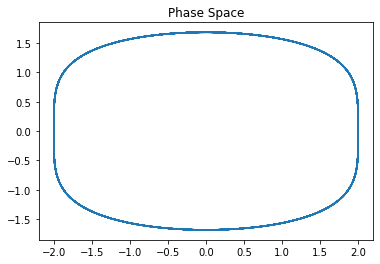

In [37]:
# Part C/D Phase spaces # 
def f2(r,t,w):
    x = r[0]
    row = r[1]
    
    w = 1.0 
    f1 = row
    f2 =-w**2 * x**3

    return np.array([f1,f2]) 
def Numerical_DE2(t0,tf,N,row0,x0):
    
    
    h = (tf-t0)/N                               # creating the step size h
    half = .5 
    sixth = 1/6          

    time = np.arange(t0,tf,h)                   # creating the time steps
    r = np.empty((len(time),2),dtype = float)   # intializing x, y 
    
    r[0][0] = row0
    r[0][1] = x0
    for c,t in enumerate(time):                 # to animate - go through this for loop to get the updated pos/velocity 
                                                                                            
        if c == N-1:
            break 
        else :
            k1 = h*f2(r[c,:],t,1)
            k2 = h*f2(r[c,:] + half*k1, t + half*h,1)
            k3 = h*f2(r[c,:] + half*k2, t + half*h,1)
            k4 = h*f2(r[c,:] + k3, t + h,1)
            r[c+1,:] = r[c,:] + sixth*(k1 + 2*k2 + 2*k3 + k4)

    
    rowl = r[:,0]
    xl = r[:,1]

    xtit = str(x0)
    plt.figure()
    
    plt.plot(time,xl)
    plt.title('X vs time, intial value x is '+xtit)
    plt.figure()
    plt.title('Phase Space')
    plt.plot(xl,rowl)

    plt.show()
    
Numerical_DE2(0,50,10000,0,1)
Numerical_DE2(0,50,10000,0,2)



## Part E - Van der pol' luting with plots - w/ different mu values

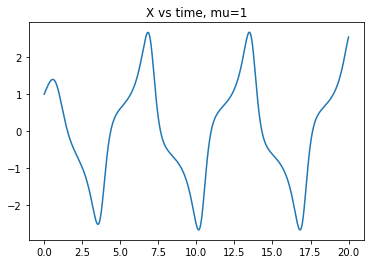

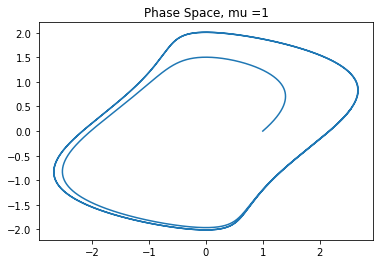

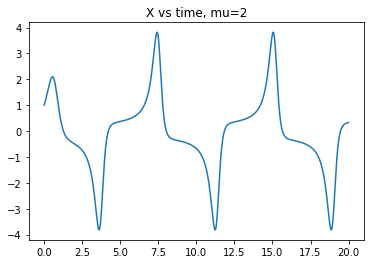

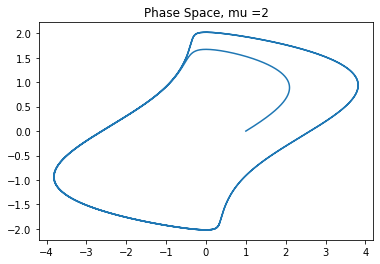

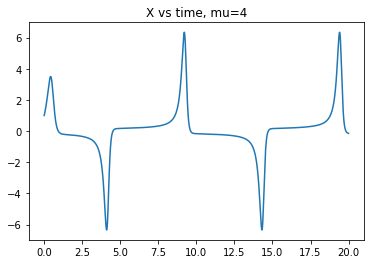

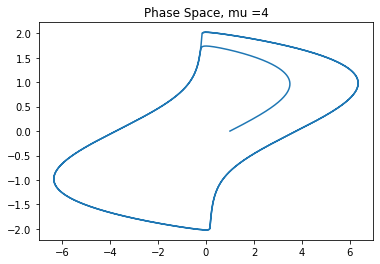

In [44]:
def fe(r,t,w,u):
    x = r[0]
    row = r[1]
    
    w = 1.0 
    f1 = row
    f2 = u*(1 - x**2)*row - w**2 *x

    return np.array([f1,f2])

def Numerical_DEE(t0,tf,N,row0,x0, w, u):
    
    
    h = (tf-t0)/N                               # creating the step size h
    half = .5 
    sixth = 1/6          

    time = np.arange(t0,tf,h)                   # creating the time steps
    r = np.empty((len(time),2),dtype = float)   # intializing x, y 
    
    r[0][0] = row0
    r[0][1] = x0
    for c,t in enumerate(time):                 # to animate - go through this for loop to get the updated pos/velocity 
                                                                                            
        if c == N-1:
            break 
        else :
            k1 = h*fe(r[c,:],t,w,u)
            k2 = h*fe(r[c,:] + half*k1, t + half*h,w,u)
            k3 = h*fe(r[c,:] + half*k2, t + half*h,w,u)
            k4 = h*fe(r[c,:] + k3, t + h,w,u)
            r[c+1,:] = r[c,:] + sixth*(k1 + 2*k2 + 2*k3 + k4)

    
    rowl = r[:,0]
    xl = r[:,1]
    ut = str(u)
    title = str('X vs time, mu='+ut)
    plt.figure()

    plt.plot(time,xl)
    plt.title(title)
    plt.figure()
    plt.title('Phase Space, mu ='+ut)
    plt.plot(xl,rowl)

    plt.show()

Numerical_DEE( 0 , 20 ,10000, 0, 1,  1,  1)
    
Numerical_DEE(0,20,10000,  0,  1,  1, 2)
Numerical_DEE(0,20,10000, 0,  1, 1, 4)

---

# Problem 8.7

## Part A - Derivation

on paper

## Part B- The Basic Trajectory 

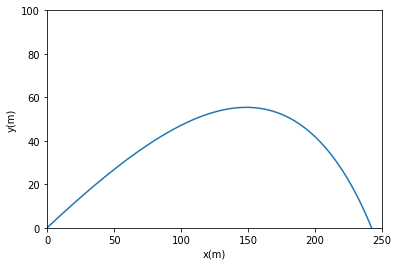

In [24]:
import numpy as np
from numpy import pi, sin, sqrt, cos 
import matplotlib.pyplot as plt 
def fun(r,t,m):
    r = np.array(r)
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    p = 1.22
    R = .08
    c = .47
    g = 9.81
    
    t1 = pi*R**2*p*c*(1/2)
    t2 = sqrt(vx*vx + vy*vy)
    
    
    f1 = vx
    f2 = vy
    f3 = - (t1 * vx * t2)/m
    f4 = -g - (t1*vy*t2)/m
    return np.array([f1,f2,f3,f4])

def Numerical_DE(t0,tf,N,x0,y0,v0,theta0,m):
    
    
    h = (tf-t0)/N                               # creating the step size h
    half = .5 
    sixth = 1/6          

    time = np.arange(t0,tf,h)                   # creating the time steps
    r = np.empty((len(time),4),dtype = float)   # intializing x, y 
    
    r[0][0] = x0
    r[0][1] = y0
    r[0][2] = v0*cos(theta0*pi/180)
    r[0][3] = v0*sin(theta0*pi/180)
    
    for c,t in enumerate(time):                 # to animate - go through this for loop to get the updated pos/velocity 
                                                                                            
        if c == N-1:
            break 
        else :
            k1 = h*fun(r[c,:],t,m)
            k2 = h*fun(r[c,:] + half*k1, t + half*h,m)
            k3 = h*fun(r[c,:] + half*k2, t + half*h,m)
            k4 = h*fun(r[c,:] + k3, t + h,m)
            r[c+1,:] = r[c,:] + sixth*(k1 + 2*k2 + 2*k3 + k4)

    
    
    xl = r[:,0]
    yl = r[:,1]
    

    
    plt.figure()

    plt.plot(xl,yl)
    plt.xlim(0,250)
    plt.xlabel('x(m)')
    plt.ylabel('y(m)')
    plt.ylim(0,100)

    plt.show()
    
    # return thetal, omegal, time 
Numerical_DE(0,10,10000,0,0,100,30,1)





    
    

## Part C - Mass vs Distance Plots

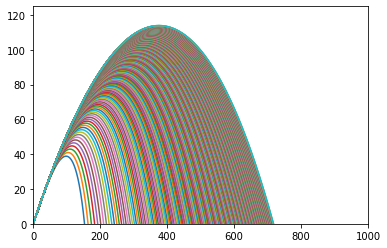

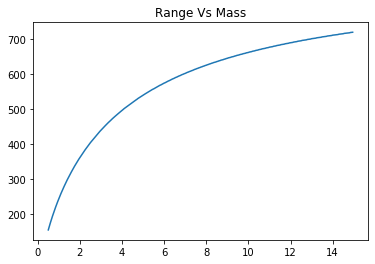

In [23]:
def Numerical_DE2(t0,tf,N,x0,y0,v0,theta0,m):
    
    
    h = (tf-t0)/N                               # creating the step size h
    half = .5 
    sixth = 1/6          

    time = np.arange(t0,tf,h)                   # creating the time steps
    r = np.empty((len(time),4),dtype = float)   # intializing x, y 
    
    r[0][0] = x0
    r[0][1] = y0
    r[0][2] = v0*cos(theta0*pi/180)
    r[0][3] = v0*sin(theta0*pi/180)
    
    for c,t in enumerate(time):                 # to animate - go through this for loop to get the updated pos/velocity 
                                                                                            
        if c == N-1:
            break 
        else :
            k1 = h*fun(r[c,:],t,m)
            k2 = h*fun(r[c,:] + half*k1, t + half*h,m)
            k3 = h*fun(r[c,:] + half*k2, t + half*h,m)
            k4 = h*fun(r[c,:] + k3, t + h,m)
            r[c+1,:] = r[c,:] + sixth*(k1 + 2*k2 + 2*k3 + k4)

    
    
    xl = r[:,0]
    yl = r[:,1]
    
    for c,l in enumerate(yl):
        if  l < 1 and l > -1: 
            distance = xl[c]
    #print(distance)
    
    
    return distance, xl,yl
            
mass = np.arange(.5, 15, .05)
r    = np.empty(len(mass))
plt.figure()
for i,m in enumerate(mass):
    r[i],x,y = Numerical_DE2(0,10,1000,0,0,100,30,m)
    plt.plot(x,y)
plt.xlim(0,1000)
plt.ylim(0,125)
plt.show()
plt.figure()
plt.title('Range Vs Mass')
plt.plot(mass,r)
plt.show()
    

---

# Problem 8.9

## Part A - The Displacement Graph

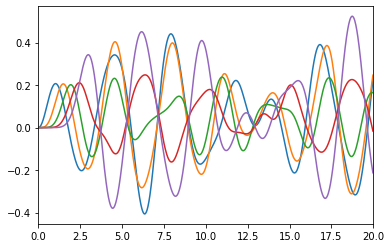

In [5]:
import numpy as np
from numpy import pi, sin, sqrt, cos 
import matplotlib.pyplot as plt 

def fn(r,t):
    w = 2.0 
    k = 6.0 
    m = 1.0 # kg
    r = np.array(r, dtype = float)
    #print(r)
    
    
    F1 = cos(w*t)
    fs = np.empty(len(r)//2, dtype = float) # Force equations
    ds = np.empty(len(r//2), dtype = float) # Displacement vector
    ps = np.empty(len(r//2), dtype = float) # Velocity vectors
    
    ds = r[0:len(r)//2]                     # Initializing DS ps vectors
    ps = r[len(r)//2:len(r)]
    #print(ds)
    #print(ps)
    
    for i in range(len(ds)):
        if i == 0: 
            fs[i] = (k/m)*(ds[1] - ds[0]) + (F1/m)
        elif i == len(ds)- 1:
            fs[i] = (k/m)*(ds[-2] - ds[-1])
        else:
            fs[i] = (k/m)*(ds[i+1] - ds[i]) + (k/m)*(ds[i-1] - ds[i])
            
            
        
    #print(fs)
    final = np.append(ps,fs)
    #print(final)
    #print(final)
    return final

def Numerical_DE(oscN,t0,tf,N):
    
    
    h = (tf-t0)/N                               # creating the step size h
    half = .5 
    sixth = 1/6          

    time = np.arange(t0,tf,h)                       # creating the time steps
    r = np.zeros((len(time),2*oscN),dtype = float)   # Creating R-vector - initalizing all to 0 
    
    
    
    for c,t in enumerate(time):                  
                                                                                            
        if c == N-1:
            break 
        else :
            k1 = h*fn(r[c,:],t)
            k2 = h*fn(r[c,:] + half*k1, t + half*h)
            k3 = h*fn(r[c,:] + half*k2, t + half*h)
            k4 = h*fn(r[c,:] + k3, t + h)
            r[c+1,:] = r[c,:] + sixth*(k1 + 2*k2 + 2*k3 + k4)

    plt.figure()
    for i in range(len(r[c,:])//2):
        plt.plot(time,r[:,i])
    plt.xlim(0,20)
    #plt.ylim(0,.4)
    plt.show()
    
    return r,time, oscN 
rs, t, Nosc = Numerical_DE(5,0,20,1000)
# print(rs)



## Part B - The animation pt 2

In [11]:
from vpython import box,sphere, cylinder, color, vector,rate, scene, canvas
scene = canvas()


radi = .105

balls = np.empty(Nosc, sphere)

displ = rs[:,:Nosc]

# print(len(displ[0,:]))
for k in range(5):

        balls[k] = sphere(pos = vector(.75*k,0,0), radius = radi, color = color.red)
while True:
    for x in range(len(displ[:,0])):
        rate(100)
        for i,b in enumerate(balls):
            b.pos = vector(.75*i - displ[x,i],0,0)
        

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

---

# Problem 8.12

## Part A - Plotting the Orbit

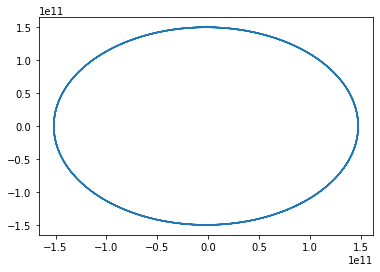

In [19]:
import numpy as np 
from numpy import sin, cos, sqrt
import matplotlib.pyplot as plt


def F(r,t):
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    
    G = 6.6738e-11*(8760*60**2)**2
    M = 1.9891e30
    gm = G*M
    
    rmag = sqrt(x**2 + y**2)
    
    f1 = vx
    f2 = vy 
    f3 = -gm*x/(rmag**3)
    f4 = -gm*y/(rmag**3)
    
    final = np.array([f1,f2,f3,f4], dtype = float)
    
    return final 

def Verlet_Meth():
    h = 1/8760.           # Step size 1 hour
    yr = 3       # Hours in a year 
    
    
    time = np.arange(0,yr+h,h) 
    
    r = np.zeros([len(time),4], dtype = float)
    r[0,:] = np.array([1.47e11, 0, 0, 3.0287e4*3600*8760.])
    
    v = np.array([r[:,2],r[:,3]])
    v = v.T
    
    v[1,:] = v[0,:] + [ .5*h*F(r[0,:],0)[0], .5*h*F(r[0,:],0)[1] ] 
    
    vm =  r[0 , 2:4] + .5*h*(F(r[0,:],0)[2:4])
    
    for i,t in enumerate(time):
        if i == len(time) - 1:
            break
        else:
            r[i + 1, 0:2] = r[i, 0:2] + h*vm
        
        
        
            k = h*F(r[i + 1,:],0)
        
        
            v[i + 1,:] = vm + [k[2]*.5, k[3]*.5]
            vm += [k[2],k[3]]
        
        
        
        

        
    
   
    # v[1,:] = v[0,:] + [.5*h*F(r[0,:],0)[0], .5*h*F(r[0,:],0)[1]] 
    
    
    return v,r,time


    
   
vi, xi, times = Verlet_Meth()

plt.figure()
plt.plot(xi[:,0],xi[:,1])
#plt.xlim(-1.48e11,-1.44e11)
plt.show()



## Part B/C - Plotting Energies 

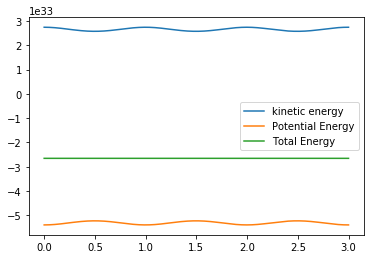

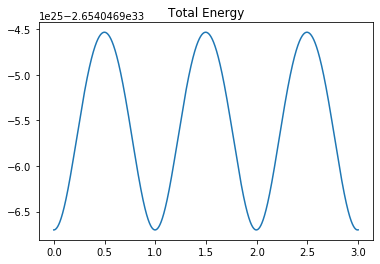

In [20]:


# Plotting energy#
m = 5.9722e24
G = 6.6738e-11
M = 1.9891e30

kenergy = .5*m*((vi[:,0]/(3600*8760))**2 + (vi[:,1]/(3600*8760))**2)
penergy = -G*M*m/sqrt((xi[:,0]**2 + (xi[:,1]**2)))
tenergy = kenergy + penergy

plt.figure()
a = plt.plot(times,kenergy, label = 'kinetic energy')

b = plt.plot(times,penergy, label = 'Potential Energy')

c = plt.plot(times,tenergy, label = 'Total Energy')
plt.legend()
plt.show()

plt.figure()
plt.title('Total Energy')
plt.plot(times,tenergy)
plt.show()


---

# Problem 8.15

## Part A: 

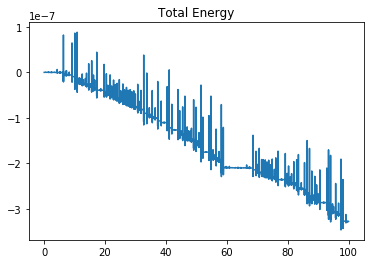

In [9]:
import numpy as np 
from numpy import sin, cos, sqrt
import matplotlib.pyplot as plt

def f(r,t):
    t1 = r[0]
    t2 = r[1]
    w1 = r[2]
    w2 = r[3]
    g = 9.81 # m/s^2
    l = .4   # m
    g_l = g/l
    
    f1 = w1
    f2 = w2
    f3 = -(w1**2*sin(2*t1 - 2*t2) + 2*w2**2*sin(t1 - t2) + g_l*(sin(t1 - 2*t2)+ 3*sin(t1)))/(3 - cos(2*t1 - 2*t2))
    f4 = (4*w1**2*sin(t1 - t2) + w2**2*sin(2*t1 - 2*t2) + 2*g_l*(sin(2*t1 - t2)- sin(t2)))/(3 - cos(2*t1 - 2*t2))

    return np.array([f1,f2,f3,f4]) 

def Numerical_DE(t0,tf,N,t10,t20,w10,w20):
    t10 *= np.pi/180
    t20 *= np.pi/180
    w10 = 0.0
    w20 = 0.0
    h = (tf-t0)/N                               # creating the step size h
    half = .5 
    sixth = 1/6          

    time = np.arange(t0,tf,h)                   # creating the time steps
    r = np.empty((len(time),4),dtype = float)   # intializing x, y 
    
    r[0][0] = t10
    r[0][1] = t20
    r[0][2] = w10
    r[0][3] = w20
    
    for c,t in enumerate(time):                 # to animate - go through this for loop to get the updated pos/velocity 
                                                                                            
        if c == N-1:
            break 
        else :
            k1 = h*f(r[c,:],t)
            k2 = h*f(r[c,:] + half*k1, t + half*h)
            k3 = h*f(r[c,:] + half*k2, t + half*h)
            k4 = h*f(r[c,:] + k3, t + h)
            r[c+1,:] = r[c,:] + sixth*(k1 + 2*k2 + 2*k3 + k4)

    
    t1l = r[:,0]
    t2l = r[:,1]
    w1l = r[:,2]
    w2l = r[:,3]
    m = 1
    l = .4
    g = 9.81
    
    te = -(m*g*l*(2*cos(t1l)+cos(t2l))) +  (m*(l**2)*(w1l**2+0.5*w2l**2+w1l*w2l*cos(t1l - t2l)))
    
    plt.figure()

    plt.plot(time,te)
    plt.title('Total Energy')
    plt.show()
    
    return  t1l,t2l

t1, t2 = Numerical_DE(0,100,100000,90,90,0,0)


## Part B - The animation pt 3

In [10]:
from vpython import box,sphere, cylinder, color, vector,rate, scene, canvas
scene = canvas()

radi = .05
vlength = .4

b1 = sphere(pos = vector(vlength*cos(t1[0]),vlength*sin(t1[0]),0), radius = radi, color = color.red)
r1  = cylinder(pos = vector(0,0,0), axis = vector(vlength*cos(t1[0]),vlength*sin(t1[0]),0), radius = .25*radi )

b2 = sphere(pos = vector(vlength*cos(t2[0]),vlength*sin(t2[0]),0), radius = radi, color = color.red)
r2  = cylinder(pos = vector(0,0,0), axis = vector(vlength*cos(t2[0]),vlength*sin(t2[0]),0), radius = .25*radi )

# base = box( pos = vector(0,0,0), length = .01, height = .01, width = .01)
while True: 
    for tt1,tt2 in zip(t1,t2):
        rate(60)
        b1.pos = vector(vlength*sin(tt1),-vlength*cos(tt1),0)
        r1.axis = vector(vlength*sin(tt1),-vlength*cos(tt1 ),0)
        
        
        r2.pos = vector(vlength*sin(tt1),-vlength*cos(tt1 ),0)
        r2.axis = vector(vlength*sin(tt2),-vlength*cos(tt2 ),0)
        b2.pos = r2.pos + r2.axis

<IPython.core.display.Javascript object>

KeyboardInterrupt: 